Cell 1.1: Import Required Libraries

In [ ]:

import pandas as pd
import requests
import io

Cell 1.2: Download Dataset from Google Drive URL

In [ ]:

def get_drive_download_url(url):
    # Extract the file ID from the URL
    file_id = url.split('/d/')[1].split('/')[0]
    # Construct the direct download URL
    download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
    return download_url

# Replace this with your Google Drive shareable link
google_drive_url = 'https://drive.google.com/file/d/12xOgyMVvKh-uMzewrxwV2NU5736TjwyA/view?usp=drive_link'


download_url = get_drive_download_url(google_drive_url)

# Download the file
response = requests.get(download_url)

# Check if the request was successful
if response.status_code == 200:
    print("Download successful!")
else:
    print("Error downloading file. Check the URL or permissions.")

Download successful!


Cell 1.3: Load the Dataset into a Pandas DataFrame



In [ ]:
# Load the downloaded content into a Pandas DataFrame
dataset = pd.read_csv(io.BytesIO(response.content), header=None)

# Assign column names: 0 to 139 for signal values, 140 for the label
column_names = [f'signal_{i}' for i in range(140)] + ['label']
dataset.columns = column_names

# Display the first few rows to verify
print("First 5 rows of the dataset:")
display(dataset.head())

First 5 rows of the dataset:


,signal_0,signal_1,signal_2,signal_3,signal_4,signal_5,signal_6,signal_7,signal_8,signal_9,...,signal_131,signal_132,signal_133,signal_134,signal_135,signal_136,signal_137,signal_138,signal_139,label
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


Cell 1.4: Basic Dataset Overview

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
dataset.info()

# Display the shape of the dataset (rows, columns)
print("\nDataset Shape:", dataset.shape)

# Check for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())

# Verify label distribution (0s and 1s)
print("\nLabel Distribution:")
print(dataset['label'].value_counts())

# Print total number of samples
print("\nTotal number of samples:", len(dataset))

# Print categories (samples per class)
print("\nCategories (samples per class):")
print(dataset['label'].value_counts().to_dict())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, signal_0 to label
dtypes: float64(141)
memory usage: 5.4 MB

Dataset Shape: (4998, 141)

Missing Values:
signal_0      0
signal_1      0
signal_2      0
signal_3      0
signal_4      0
             ..
signal_136    0
signal_137    0
signal_138    0
signal_139    0
label         0
Length: 141, dtype: int64

Label Distribution:
label
1.0    2919
0.0    2079
Name: count, dtype: int64

Total number of samples: 4998

Categories (samples per class):
{1.0: 2919, 0.0: 2079}


Cell 2.1: Dataset Exploration

Heatmap (Entire Dataset as Image)

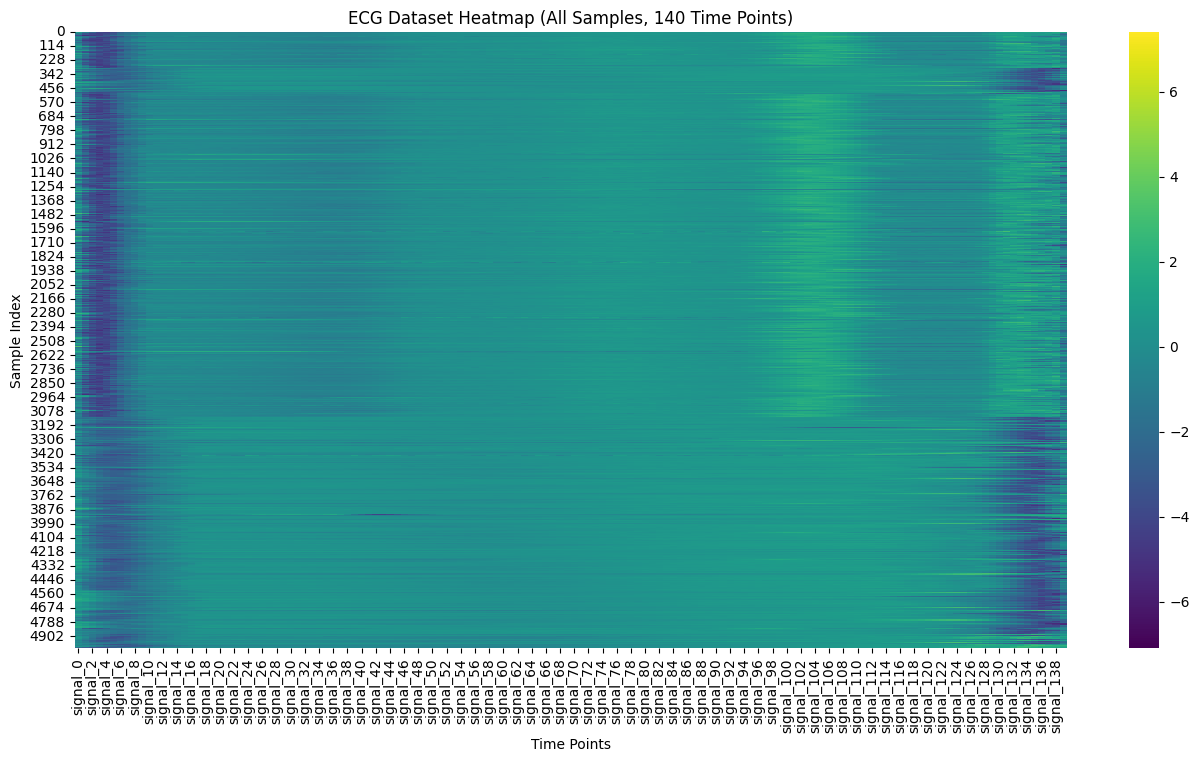

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.heatmap(dataset.iloc[:, :-1], cmap='viridis', cbar=True)
plt.title("ECG Dataset Heatmap (All Samples, 140 Time Points)")
plt.xlabel("Time Points")
plt.ylabel("Sample Index")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Check for duplicate records
print("\nNumber of Duplicate Rows:", dataset.duplicated().sum())

# Basic descriptive statistics to understand distribution
print("\nDescriptive Statistics:")
display(dataset.describe())


Number of Duplicate Rows: 0

Descriptive Statistics:


,signal_0,signal_1,signal_2,signal_3,signal_4,signal_5,signal_6,signal_7,signal_8,signal_9,...,signal_131,signal_132,signal_133,signal_134,signal_135,signal_136,signal_137,signal_138,signal_139,label
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


Cell 2.2: Statistical Summary & Data Quality Checks


Descriptive Statistics:


,Mean,Median,Mode,Variance,Std Dev,25th Percentile
signal_0,-0.262502,-0.297541,-6.729499,1.328140,1.152450,-1.004220
signal_1,-1.649828,-1.661892,-7.090374,2.089593,1.445542,-2.701936
signal_2,-2.492623,-2.586129,-5.132459,1.922262,1.386457,-3.668585
signal_3,-3.119754,-3.388210,-4.433321,1.697604,1.302921,-4.227337
signal_4,-3.167656,-3.469899,-5.375715,1.219998,1.104535,-4.007630
...,...,...,...,...,...,...
signal_136,-0.835173,-0.195151,-3.713105,4.228354,2.056296,-2.868603
signal_137,-0.642739,-0.194423,-5.496107,3.457404,1.859409,-2.154560
signal_138,-0.487667,-0.160262,1.517380,3.352884,1.831088,-1.658289
signal_139,-0.706574,-0.568443,-6.092227,2.000566,1.414414,-1.596809



Skewness and Kurtosis:


,Skewness,Kurtosis
signal_0,0.020580,0.787622
signal_1,0.146644,-0.359350
signal_2,0.460696,-0.456236
signal_3,0.772745,-0.046609
signal_4,1.031621,0.798957
...,...,...
signal_136,-0.349216,-1.311097
signal_137,-0.472571,-0.952220
signal_138,-0.681378,-0.275727
signal_139,-0.468517,0.656984


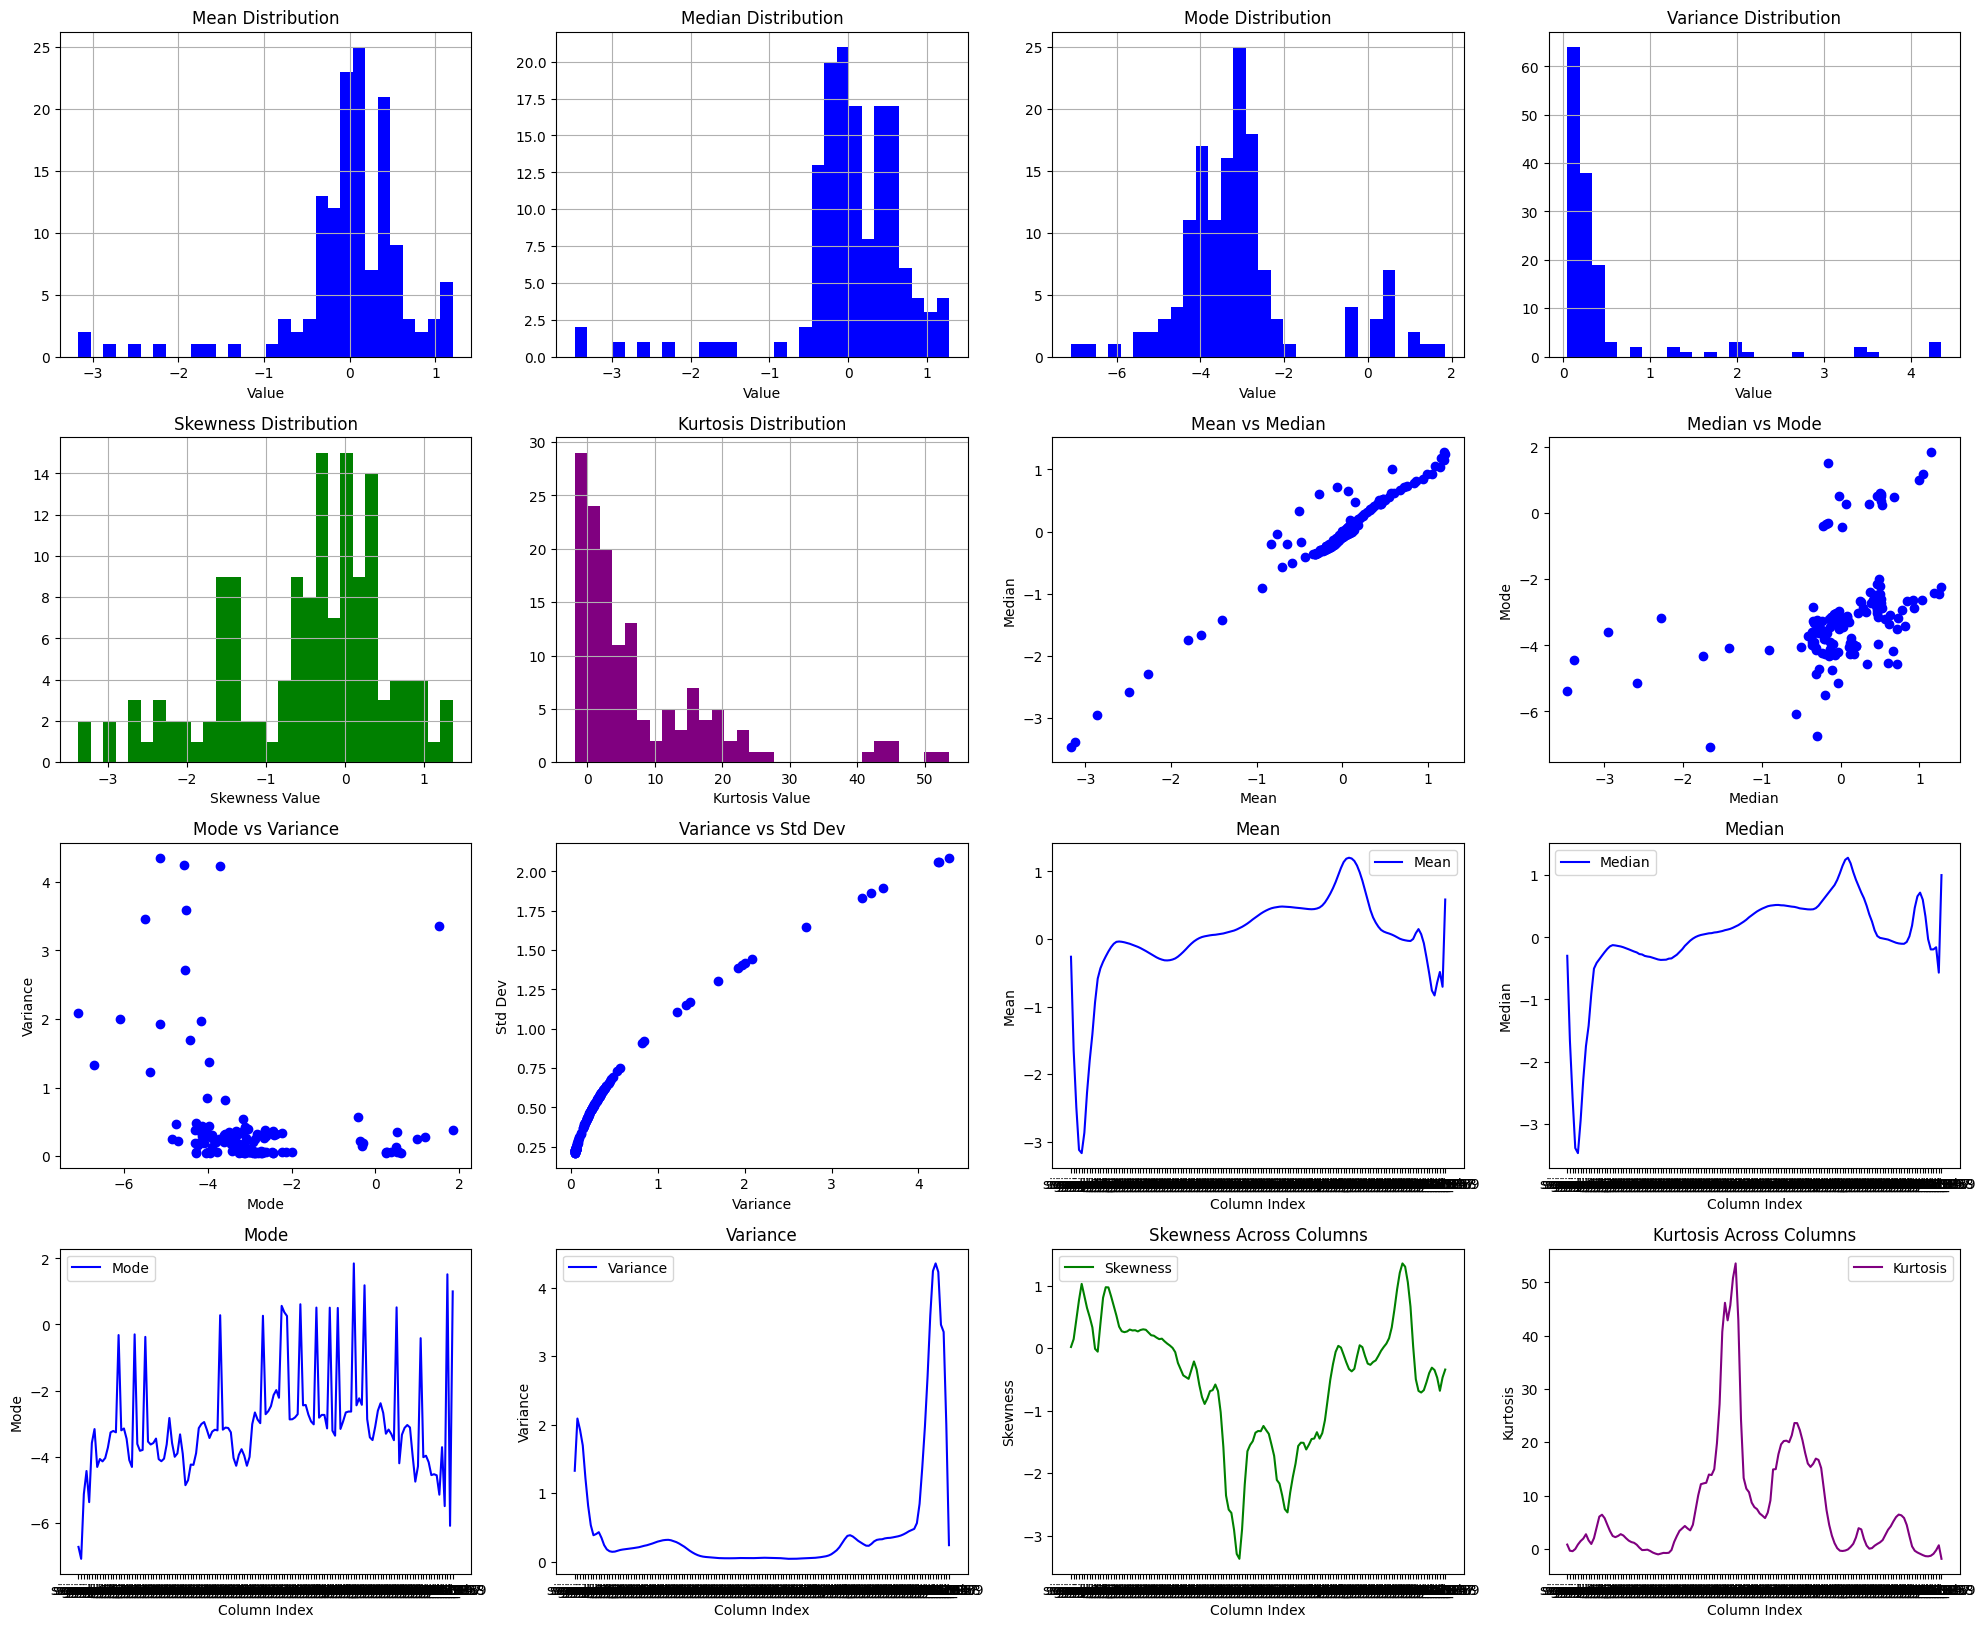

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Compute statistical measures per column (time-series points)
stats_summary = pd.DataFrame({
    'Mean': dataset.mean(),
    'Median': dataset.median(),
    'Mode': dataset.mode().iloc[0],
    'Variance': dataset.var(),
    'Std Dev': dataset.std(),
    '25th Percentile': dataset.quantile(0.25)
})

print("\nDescriptive Statistics:")
display(stats_summary)

# Compute skewness and kurtosis
skewness = dataset.apply(skew)
kurt = dataset.apply(kurtosis)
skew_kurt_summary = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurt
})
print("\nSkewness and Kurtosis:")
display(skew_kurt_summary)

# Visualization Section
plt.figure(figsize=(20, 20))

# 1-4: Histograms for Mean, Median, Mode, Variance
for i, (stat, values) in enumerate(stats_summary.items(), 1):
    if stat in ['Mean', 'Median', 'Mode', 'Variance']:
        plt.subplot(5, 4, i)
        values.hist(bins=30, color='blue')
        plt.title(f'{stat} Distribution')
        plt.xlabel("Value")

# 5-6: Histograms for Skewness and Kurtosis
plt.subplot(5, 4, 5)
skewness.hist(bins=30, color='green')
plt.title('Skewness Distribution')
plt.xlabel("Skewness Value")

plt.subplot(5, 4, 6)
kurt.hist(bins=30, color='purple')
plt.title('Kurtosis Distribution')
plt.xlabel("Kurtosis Value")

# 7-8: Scatter Plots (Mean vs Median, Median vs Mode)
plt.subplot(5, 4, 7)
plt.scatter(stats_summary['Mean'], stats_summary['Median'], color='blue')
plt.title('Mean vs Median')
plt.xlabel('Mean')
plt.ylabel('Median')

plt.subplot(5, 4, 8)
plt.scatter(stats_summary['Median'], stats_summary['Mode'], color='blue')
plt.title('Median vs Mode')
plt.xlabel('Median')
plt.ylabel('Mode')

# 9-10: Scatter Plots (Mode vs Variance, Variance vs Std Dev)
plt.subplot(5, 4, 9)
plt.scatter(stats_summary['Mode'], stats_summary['Variance'], color='blue')
plt.title('Mode vs Variance')
plt.xlabel('Mode')
plt.ylabel('Variance')

plt.subplot(5, 4, 10)
plt.scatter(stats_summary['Variance'], stats_summary['Std Dev'], color='blue')
plt.title('Variance vs Std Dev')
plt.xlabel('Variance')
plt.ylabel('Std Dev')

# 11-16: Time-Series Plots for Mean, Median, Mode, Variance, Skewness, Kurtosis
for i, stat in enumerate(['Mean', 'Median', 'Mode', 'Variance'], 11):
    plt.subplot(5, 4, i)
    plt.plot(stats_summary.index, stats_summary[stat], label=stat, color='blue')
    plt.title(stat)
    plt.xlabel('Column Index')
    plt.ylabel(stat)
    plt.legend()

# Time-Series Plot for Skewness
plt.subplot(5, 4, 15)
plt.plot(skew_kurt_summary.index, skew_kurt_summary['Skewness'], label='Skewness', color='green')
plt.title('Skewness Across Columns')
plt.xlabel('Column Index')
plt.ylabel('Skewness')
plt.legend()

# Time-Series Plot for Kurtosis
plt.subplot(5, 4, 16)
plt.plot(skew_kurt_summary.index, skew_kurt_summary['Kurtosis'], label='Kurtosis', color='purple')
plt.title('Kurtosis Across Columns')
plt.xlabel('Column Index')
plt.ylabel('Kurtosis')
plt.legend()

plt.tight_layout()
plt.show()

Cell 2.3: Data Cleaning & Transformation

In [ ]:
# Handle missing values (impute with median to preserve distribution)
dataset_cleaned = dataset.fillna(dataset.median())

print("Missing Values After Imputation:")
print(dataset_cleaned.isnull().sum())

Missing Values After Imputation:
signal_0      0
signal_1      0
signal_2      0
signal_3      0
signal_4      0
             ..
signal_136    0
signal_137    0
signal_138    0
signal_139    0
label         0
Length: 141, dtype: int64


Cell 2.4: Feature Engineering

Cell 2.4.1: Define Feature Extraction Functions

In [ ]:
# Install required packages
!pip install pywavelets
!pip install scipy

# Import libraries
import numpy as np
import pandas as pd
from scipy import stats, signal
import pywt
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.2 MB/s eta 0:00:00


In [ ]:
def extract_features(ecg_data):
    features = {}

    # Runtime check for signal module
    if not hasattr(signal, 'find_peaks'):
        raise ValueError("signal.find_peaks is not available! Check imports or overrides.")

    # A. Statistical Features (Extraction)
    features['mean'] = np.nanmean(ecg_data)              # 1. Mean (handles NaN)
    features['std'] = np.nanstd(ecg_data)                # 2. Standard Deviation
    features['skewness'] = stats.skew(ecg_data, nan_policy='omit')  # 3. Skewness
    features['kurtosis'] = stats.kurtosis(ecg_data, nan_policy='omit')  # 4. Kurtosis
    features['range'] = np.nanmax(ecg_data) - np.nanmin(ecg_data)  # 5. Range

    # B. Time-Domain Features (Extraction)
    features['rms'] = np.sqrt(np.nanmean(ecg_data**2))   # 6. RMS
    features['zcr'] = ((ecg_data[:-1] * ecg_data[1:]) < 0).sum() / len(ecg_data)  # 7. Zero-Crossing Rate
    peaks, _ = signal.find_peaks(ecg_data, height=np.nanmean(ecg_data) + np.nanstd(ecg_data), distance=10)  # 8. Peak Detection
    features['peak_count'] = len(peaks)                  # Count of R-Peaks
    features['peaks'] = peaks                            # Temporary storage

    # C. Frequency-Domain Features (Extraction)
    freqs, psd = signal.welch(ecg_data, fs=360)          # Assuming 360 Hz sampling rate
    features['psd_mean'] = np.mean(psd)                  # 11. PSD (mean)
    features['dominant_freq'] = freqs[np.argmax(psd)]    # 12. Dominant Frequency
    # New: Total PSD Power
    features['psd_total'] = np.sum(psd)                  # 13. Total PSD Power
    # New: Fourier Transform (max amplitude)
    fft_vals = np.abs(np.fft.fft(ecg_data))
    features['fft_max'] = np.max(fft_vals[:len(fft_vals)//2])  # 14. Max FFT amplitude (positive frequencies)
    # New: Band Energy Ratios
    low_band = (freqs >= 0.5) & (freqs <= 5)             # Low-frequency band (0.5–5 Hz, heart rate)
    high_band = (freqs > 5) & (freqs <= 40)              # High-frequency band (5–40 Hz, QRS)
    low_energy = np.sum(psd[low_band])
    high_energy = np.sum(psd[high_band])
    total_energy = low_energy + high_energy
    features['band_energy_ratio'] = low_energy / total_energy if total_energy > 0 else 0  # 15. Low/Total energy ratio

    # D. Time-Frequency Features (Extraction)
    coeffs = pywt.wavedec(ecg_data, 'db4', level=4)
    features['wavelet_energy'] = np.sum([np.sum(c**2) for c in coeffs])  # 16. Wavelet Energy
    # New: Wavelet Coefficients Variance
    features['wavelet_variance'] = np.mean([np.var(c) for c in coeffs])  # 17. Wavelet Coefficients Variance

    return features

Cell 2.4.2: Define Feature Creation Functions

In [ ]:
def create_features(ecg_data, extracted_features):
    features = {}

    peaks = extracted_features['peaks']
    if len(peaks) > 1:
        rr_intervals = np.diff(peaks)
        features['rr_mean'] = np.mean(rr_intervals)    # 9. RR Intervals (mean)
        features['hrv_sdnn'] = np.std(rr_intervals)    # 10. HRV (SDNN)
        features['rr_median'] = np.median(rr_intervals) # 14. RR Interval Median
    else:
        features['rr_mean'] = 0
        features['hrv_sdnn'] = 0
        features['rr_median'] = 0

    if len(peaks) > 0:
        qrs_duration = []
        qrs_amplitudes = []
        for peak in peaks:
            left = max(0, peak - 5)
            right = min(len(ecg_data), peak + 5)
            qrs_duration.append(right - left)
            qrs_amplitudes.append(ecg_data[peak])  # R-peak amplitude
        features['qrs_duration'] = np.mean(qrs_duration)  # 15. QRS Duration
        features['qrs_amplitude'] = np.mean(qrs_amplitudes)  # 16. QRS Amplitude (new)
    else:
        features['qrs_duration'] = 0
        features['qrs_amplitude'] = 0

    # New: P-Wave Detection
    p_wave_count = 0
    p_wave_amplitudes = []
    if len(peaks) > 0:
        for peak in peaks:
            # Search for P-wave before R-peak (window: 20–5 samples before)
            search_start = max(0, peak - 20)
            search_end = max(0, peak - 5)
            if search_end > search_start:
                p_peaks, _ = signal.find_peaks(ecg_data[search_start:search_end],
                                             height=np.nanmean(ecg_data) * 0.5)  # Lower threshold
                p_peaks = p_peaks + search_start  # Adjust indices
                p_wave_count += len(p_peaks)
                p_wave_amplitudes.extend(ecg_data[p_peaks])
    features['p_wave_count'] = p_wave_count              # 17. P-Wave Count
    features['p_wave_amplitude'] = np.mean(p_wave_amplitudes) if p_wave_amplitudes else 0  # 18. P-Wave Amplitude

    # New: T-Wave Detection
    t_wave_count = 0
    t_wave_amplitudes = []
    if len(peaks) > 0:
        for peak in peaks:
            # Search for T-wave after R-peak (window: 5–30 samples after)
            search_start = min(len(ecg_data), peak + 5)
            search_end = min(len(ecg_data), peak + 30)
            if search_end > search_start:
                t_peaks, _ = signal.find_peaks(ecg_data[search_start:search_end],
                                             height=np.nanmean(ecg_data) * 0.7)  # Moderate threshold
                t_peaks = t_peaks + search_start  # Adjust indices
                t_wave_count += len(t_peaks)
                t_wave_amplitudes.extend(ecg_data[t_peaks])
    features['t_wave_count'] = t_wave_count              # 19. T-Wave Count
    features['t_wave_amplitude'] = np.mean(t_wave_amplitudes) if t_wave_amplitudes else 0  # 20. T-Wave Amplitude

    return features

Cell 2.4.3: Extract and Create Features for All Rows

In [ ]:
import numpy as np
import scipy.stats as stats
import scipy.signal as signal
import pywt

# Use dataset from Cell 1.3, excluding the label column for ecg_signals
ecg_signals = dataset.iloc[:, :-1].values  # All rows, columns signal_0 to signal_139
labels = dataset['label'].values  # Label column

all_features = []

for i, ecg_row in enumerate(ecg_signals):
    try:
        extracted = extract_features(ecg_row)
        created = create_features(ecg_row, extracted)
        combined_features = {**extracted, **created}
        combined_features.pop('peaks')
        combined_features['label'] = labels[i]
        all_features.append(combined_features)
    except Exception as e:
        print(f"Error processing row {i}: {e}")
        default_features = {
            'mean': 0, 'std': 0, 'skewness': 0, 'kurtosis': 0, 'range': 0,
            'rms': 0, 'zcr': 0, 'peak_count': 0, 'psd_mean': 0, 'dominant_freq': 0,
            'wavelet_energy': 0, 'rr_mean': 0, 'hrv_sdnn': 0, 'rr_median': 0, 'qrs_duration': 0,
            'label': labels[i]
        }
        all_features.append(default_features)

feature_df = pd.DataFrame(all_features)
print("Feature DataFrame shape:", feature_df.shape)
print("Feature columns:", feature_df.columns.tolist())
print(feature_df.head())

/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 140, using nperseg = 140
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Feature DataFrame shape: (4998, 25)
Feature columns: ['mean', 'std', 'skewness', 'kurtosis', 'range', 'rms', 'zcr', 'peak_count', 'psd_mean', 'dominant_freq', 'psd_total', 'fft_max', 'band_energy_ratio', 'wavelet_energy', 'wavelet_variance', 'rr_mean', 'hrv_sdnn', 'rr_median', 'qrs_duration', 'qrs_amplitude', 'p_wave_count', 'p_wave_amplitude', 't_wave_count', 't_wave_amplitude', 'label']
           mean       std  skewness  kurtosis     range       rms       zcr  \
0  4.785714e-10  0.996422 -1.753863  6.308753  6.501382  0.996422  0.021429   
1 -7.507143e-10  0.996422 -2.117528  7.805463  6.670925  0.996422  0.042857   
2 -6.435715e-10  0.996422 -1.571402  6.204692  6.847080  0.996422  0.042857   
3  5.214285e-10  0.996422 -1.803959  6.272476  6.319592  0.996422  0.035714   
4  6.642858e-10  0.996422 -1.416947  4.287013  6.079910  0.996422  0.028571   

   peak_count  psd_mean  dominant_freq  ...  rr_mean  hrv_sdnn  rr_median  \
0           1  0.001924       2.571429  ...      0.0    

Correlation Heatmap for All Features

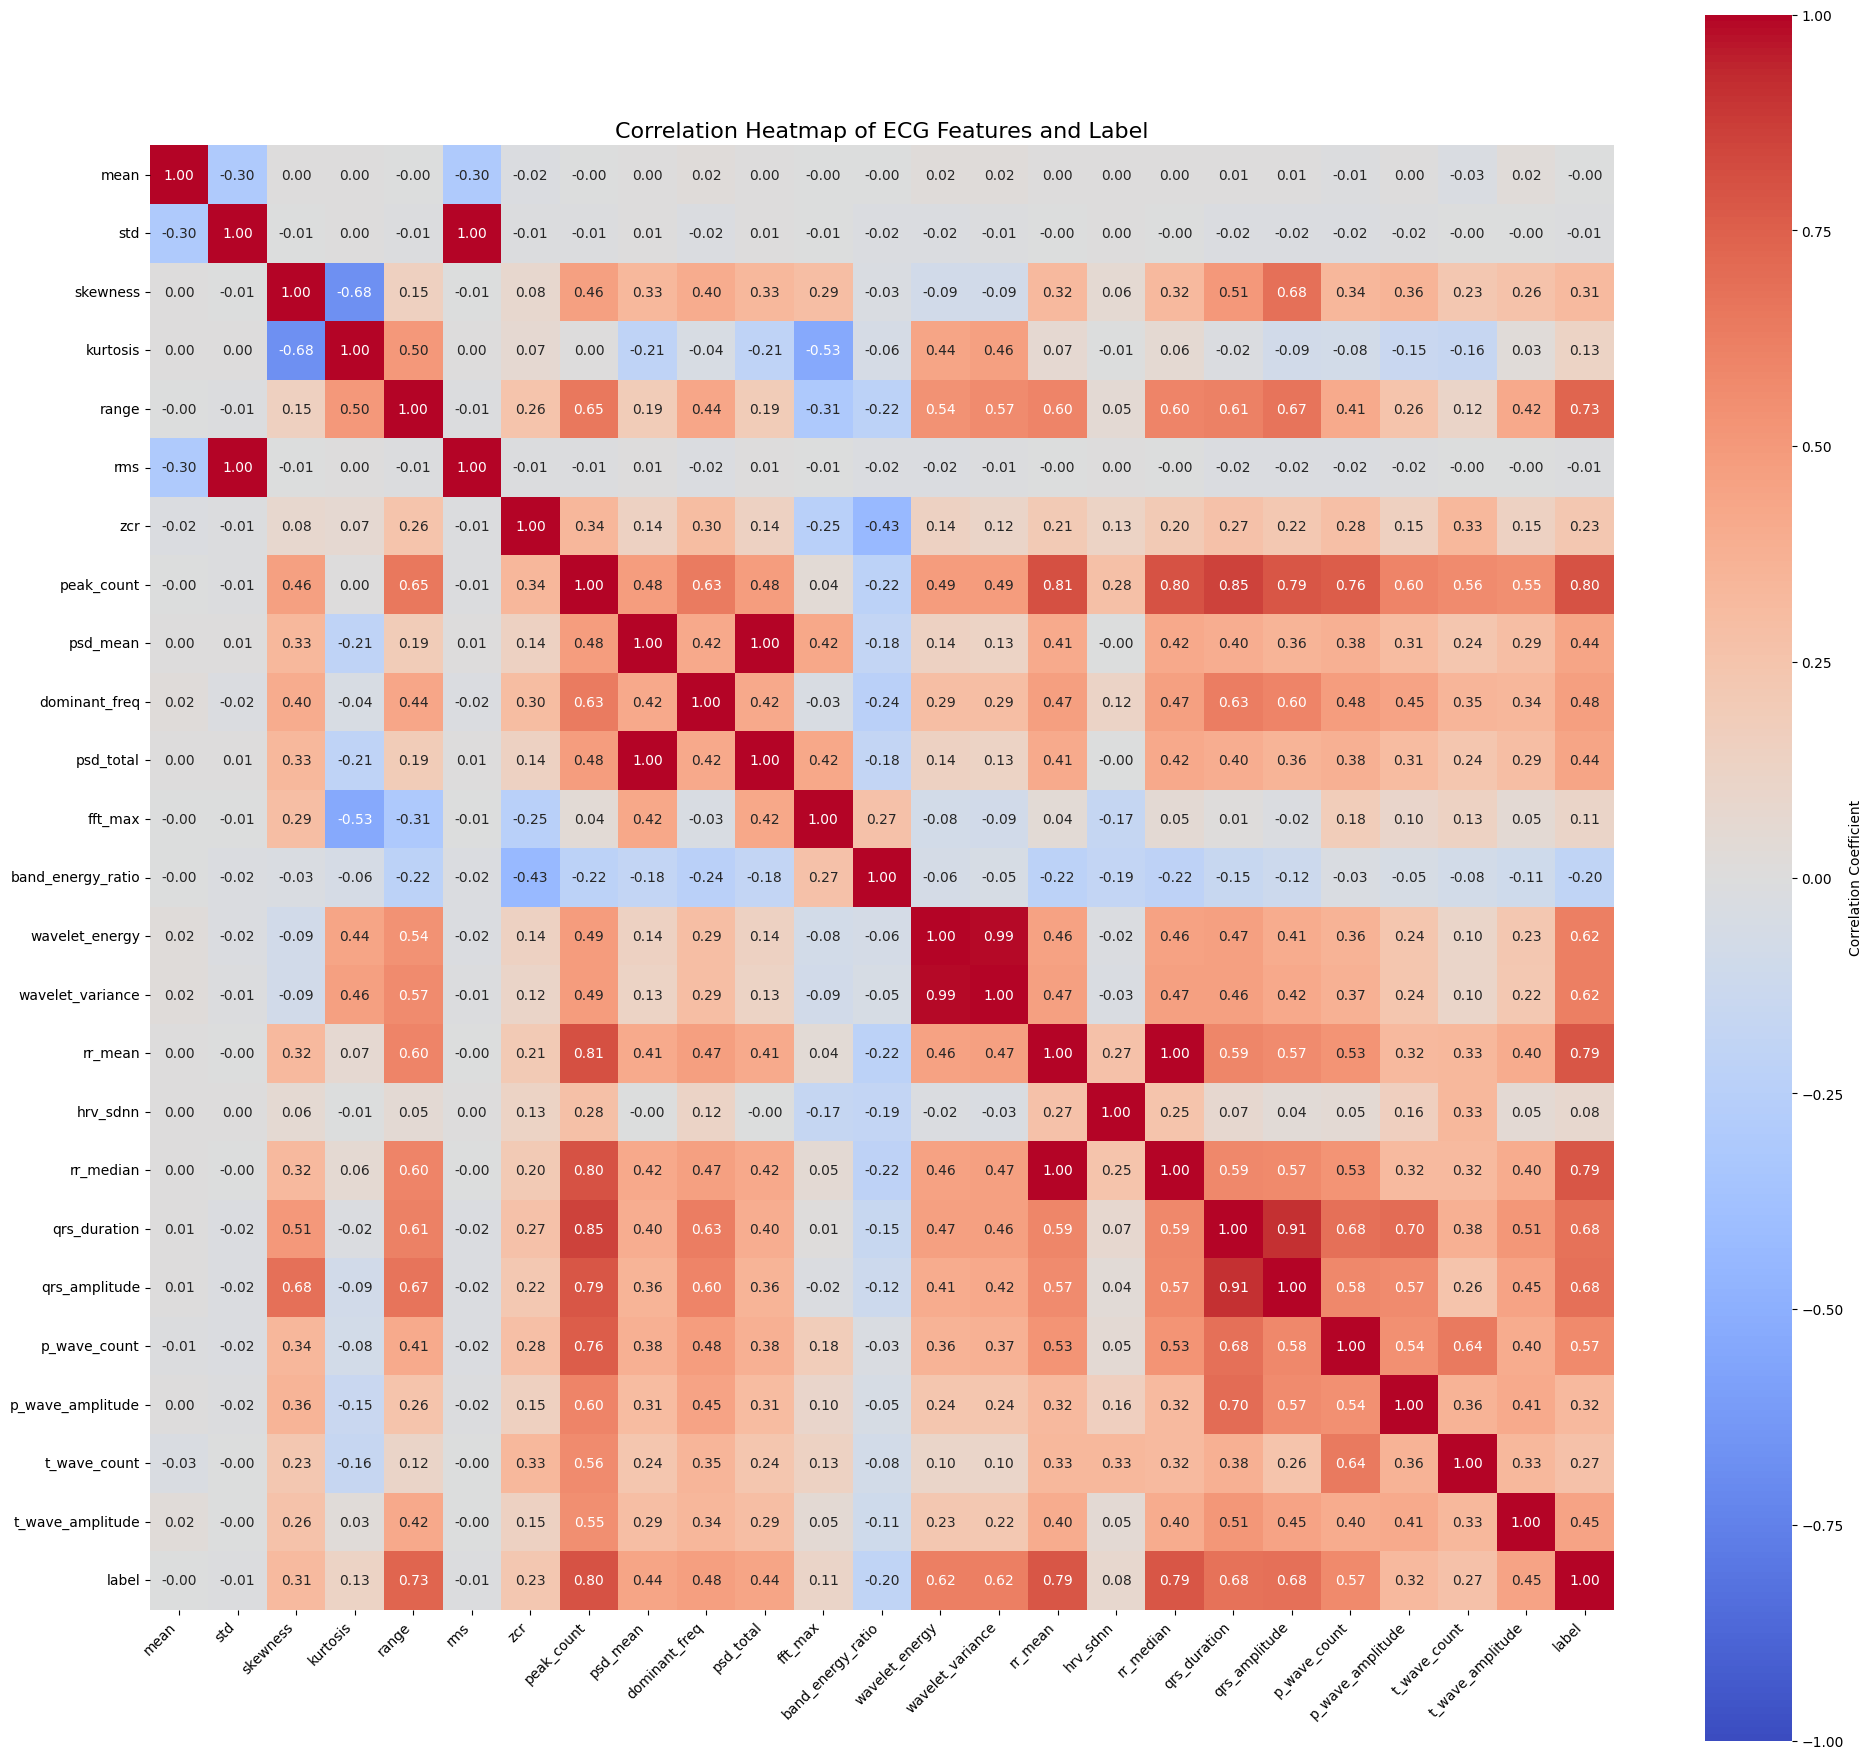

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute the correlation matrix for all features (including label)
corr_matrix = feature_df.corr()

# Create a heatmap
plt.figure(figsize=(20, 18))  # Large size to accommodate 25x25 matrix
sns.heatmap(corr_matrix,
            annot=True,  # Show correlation values
            fmt='.2f',   # Format to 2 decimal places
            cmap='coolwarm',  # Diverging colormap for positive/negative correlations
            vmin=-1, vmax=1,  # Correlation range
            center=0,  # Center at 0 for diverging colormap
            square=True,  # Square cells for better readability
            cbar_kws={'label': 'Correlation Coefficient'})  # Colorbar label

# Customize the plot
plt.title('Correlation Heatmap of ECG Features and Label', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

# Cell 2.5: Select Best 15 Features Using Mutual Information and Correlation

Selected Features (Top 15 with High MI and Correlation < 0.9):
['qrs_amplitude', 'rr_median', 'peak_count', 'p_wave_amplitude', 'range', 'psd_mean', 'p_wave_count', 'wavelet_variance', 'dominant_freq', 'skewness', 't_wave_amplitude', 't_wave_count', 'band_energy_ratio', 'zcr', 'kurtosis']

Mutual Information Scores for All Features:
              Feature  MI_Score
19      qrs_amplitude  0.507275
17          rr_median  0.493022
15            rr_mean  0.486577
7          peak_count  0.461905
21   p_wave_amplitude  0.442916
4               range  0.369932
8            psd_mean  0.361872
10          psd_total  0.361872
18       qrs_duration  0.322947
20       p_wave_count  0.317833
14   wavelet_variance  0.255837
9       dominant_freq  0.252115
13     wavelet_energy  0.246674
2            skewness  0.238918
23   t_wave_amplitude  0.170831
22       t_wave_count  0.151304
12  band_energy_ratio  0.126820
6                 zcr  0.077765
3            kurtosis  0.050470
11            fft_max  0.

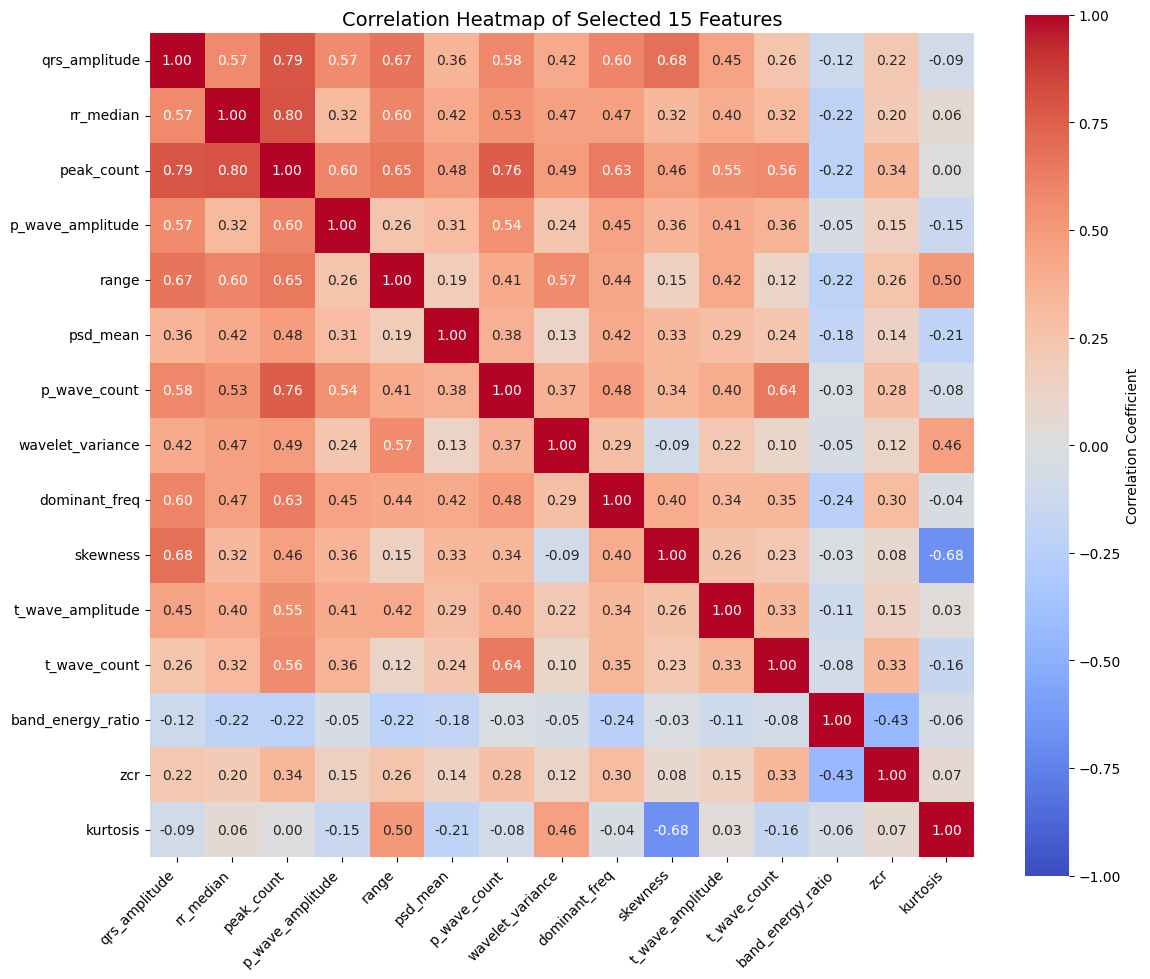

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute Mutual Information with the label
X = feature_df.drop(columns=['label'])  # Features (24 columns)
y = feature_df['label']  # Binary labels
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Step 2: Compute Correlation Matrix (excluding label)
corr_matrix = X.corr().abs()  # Absolute values for correlation comparison
np.fill_diagonal(corr_matrix.values, 0)  # Set diagonal to 0 (self-correlation)

# Step 3: Select Features (high MI, low correlation)
selected_features = []
corr_threshold = 0.9  # Correlation threshold for redundancy

for feature in mi_df['Feature']:
    if not selected_features:  # Add first feature (highest MI)
        selected_features.append(feature)
    else:
        # Check correlation with already selected features
        max_corr = corr_matrix.loc[feature, selected_features].max()
        if max_corr < corr_threshold:
            selected_features.append(feature)

    # Stop at 15 features
    if len(selected_features) >= 15:
        break

# Step 4: Output Results
print("Selected Features (Top 15 with High MI and Correlation < 0.9):")
print(selected_features)
print("\nMutual Information Scores for All Features:")
print(mi_df)

# Visualize Correlation Matrix of Selected Features
selected_corr_matrix = feature_df[selected_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            center=0,
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Selected 15 Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Code for Cell 2.6: Feature Transformation: Standardization (Z-score Normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define the selected 15 features from the correlation heatmap
selected_features = [
    'qrs_amplitude', 'rr_median', 'peak_count', 'p_wave_amplitude', 'range',
    'psd_mean', 'p_wave_count', 'wavelet_variance', 'dominant_freq', 'skewness',
    't_wave_amplitude', 't_wave_count', 'band_energy_ratio', 'zcr', 'kurtosis'
]

# Extract the selected features and label from feature_df
data_to_scale = feature_df[selected_features]
label = feature_df['label']

# Initialize and fit the StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Convert scaled data back to DataFrame with original feature names
scaled_df = pd.DataFrame(scaled_data, columns=selected_features, index=feature_df.index)

# Combine scaled features with the label and other original features
other_features = [col for col in feature_df.columns if col not in selected_features and col != 'label']
feature_df_scaled = pd.concat([scaled_df, feature_df[other_features], label], axis=1)

# Verify the transformation
print("First 5 rows of standardized feature_df:")
print(feature_df_scaled[selected_features].head())
print("\nSummary Statistics of Standardized Features:")
print(feature_df_scaled[selected_features].describe())

# Optional: Check mean and std for a few features to confirm standardization
for feature in selected_features[:3]:  # Check first 3 features as an example
    mean = np.mean(feature_df_scaled[feature])
    std = np.std(feature_df_scaled[feature])
    print(f"\n{feature} - Mean: {mean:.4f}, Std: {std:.4f}")

First 5 rows of standardized feature_df:
   qrs_amplitude  rr_median  peak_count  p_wave_amplitude     range  psd_mean  \
0       1.008253  -1.048876   -0.395893          0.080296  0.851810  0.584195   
1       0.421494   1.069229    0.684169         -0.049644  1.057424 -0.087426   
2       0.581637   0.539703    0.684169          0.511240  1.271058  0.899691   
3       0.494216   1.069229    0.684169          0.493208  0.631342  0.596027   
4       0.465262   0.833884    0.684169          1.188207  0.340664  0.558345   

   p_wave_count  wavelet_variance  dominant_freq  skewness  t_wave_amplitude  \
0      0.144800          0.840833       0.370746 -0.080297          0.788378   
1      0.144800          1.601649       0.370746 -0.603844          0.124403   
2      0.144800          0.894032       0.370746  0.182381          1.074782   
3      0.585548          0.408891       0.370746 -0.152417          0.001374   
4      0.144800         -0.091707       0.370746  0.404739          1.36

Code for Cell 2.7: Hypothesis Testing Methods Used (t-test)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Define the selected 15 features from previous steps
selected_features = [
    'qrs_amplitude', 'rr_median', 'peak_count', 'p_wave_amplitude', 'range',
    'psd_mean', 'p_wave_count', 'wavelet_variance', 'dominant_freq', 'skewness',
    't_wave_amplitude', 't_wave_count', 'band_energy_ratio', 'zcr', 'kurtosis'
]

# Here, we'll use feature_df_scaled from Cell 2.6 for original features
data = feature_df_scaled[selected_features]

# Split data by label
label_0 = feature_df_scaled[feature_df_scaled['label'] == 0][selected_features]
label_1 = feature_df_scaled[feature_df_scaled['label'] == 1][selected_features]

# Perform t-test for each feature
t_test_results = {}
for feature in selected_features:
    t_stat, p_value = ttest_ind(label_0[feature].dropna(), label_1[feature].dropna(), equal_var=True)
    t_test_results[feature] = {'t-statistic': t_stat, 'p-value': p_value}

# Convert results to DataFrame
t_test_df = pd.DataFrame(t_test_results).T
t_test_df['Significant (p < 0.05)'] = t_test_df['p-value'] < 0.05

# Display results
print("T-test Results for Selected 15 Features:")
print(t_test_df)
print("\nFeatures with Significant Differences (p < 0.05):")
print(t_test_df[t_test_df['Significant (p < 0.05)'] == True].index.tolist())


T-test Results for Selected 15 Features:
                   t-statistic        p-value  Significant (p < 0.05)
qrs_amplitude       -65.946993   0.000000e+00                    True
rr_median           -89.638537   0.000000e+00                    True
peak_count          -93.868057   0.000000e+00                    True
p_wave_amplitude    -24.096625  1.826888e-121                    True
range               -75.135599   0.000000e+00                    True
psd_mean            -34.672296  3.114403e-236                    True
p_wave_count        -49.105449   0.000000e+00                    True
wavelet_variance    -56.143257   0.000000e+00                    True
dominant_freq       -38.246281  5.998329e-281                    True
skewness            -23.285168  6.033587e-114                    True
t_wave_amplitude    -35.560957  4.120464e-247                    True
t_wave_count        -20.011891   9.199507e-86                    True
band_energy_ratio    14.209699   5.932677e-45    

Code for Cell 2.8: Feature Reduction using LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import numpy as np

# Define the selected 15 features from previous steps
selected_features = [
    'qrs_amplitude', 'rr_median', 'peak_count', 'p_wave_amplitude', 'range',
    'psd_mean', 'p_wave_count', 'wavelet_variance', 'dominant_freq', 'skewness',
    't_wave_amplitude', 't_wave_count', 'band_energy_ratio', 'zcr', 'kurtosis'
]

X = feature_df_scaled[selected_features].values  # Features (standardized)
y = feature_df_scaled['label'].values  # Binary labels

# Initialize and fit LDA (reduce to 1 component since label is binary)
lda = LDA(n_components=1)  # Max components = number of classes - 1 (binary = 1)
X_lda = lda.fit_transform(X, y)

# Create a new DataFrame with the LDA components
lda_df = pd.DataFrame(X_lda, columns=['LDA_Component_1'], index=feature_df_scaled.index)

# Combine with the label
lda_df = pd.concat([lda_df, feature_df_scaled['label']], axis=1)

# Verify the transformation
print("First 5 rows of LDA-reduced data:")
print(lda_df.head())
print("\nShape of LDA-reduced data:", lda_df.shape)
print("\nExplained Variance Ratio by LDA Component:", lda.explained_variance_ratio_)



First 5 rows of LDA-reduced data:
   LDA_Component_1  label
0         0.589577    1.0
1         2.655998    1.0
2         2.467360    1.0
3         1.803243    1.0
4         1.269893    1.0

Shape of LDA-reduced data: (4998, 2)

Explained Variance Ratio by LDA Component: [1.]


Cell 3.1: Training and Saving Random Forest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
import numpy as np
import os
from google.colab import drive

# Define the path to save the model in Google Drive
save_path = '/content/drive/My Drive/Sem 6/DAV/random_forest_model.joblib'

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Use LDA-reduced data from Cell 2.7
X = lda_df['LDA_Component_1'].values.reshape(-1, 1)  # Feature (1D array to 2D)
y = lda_df['label'].values  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate and print training accuracy
train_score = rf_model.score(X_train, y_train)
print(f"Random Forest Training Accuracy: {train_score:.4f}")

# Save the model to Google Drive
joblib.dump(rf_model, save_path)
print(f"Random Forest model saved as '{save_path}'")

# Test on the first row's original signals
selected_features = [
    'qrs_amplitude', 'rr_median', 'peak_count', 'p_wave_amplitude', 'range',
    'psd_mean', 'p_wave_count', 'wavelet_variance', 'dominant_freq', 'skewness',
    't_wave_amplitude', 't_wave_count', 'band_energy_ratio', 'zcr', 'kurtosis'
]
first_row_signals = feature_df_scaled.iloc[0][selected_features].values.reshape(1, -1)  # 15 selected features
first_row_lda = lda.transform(first_row_signals)  # Transform using pre-fitted LDA
prediction = rf_model.predict(first_row_lda)
true_label = feature_df_scaled.iloc[0]['label']
print(f"\nPrediction for first row: {prediction[0]}, True Label: {true_label}")

# Evaluate on test set
test_score = rf_model.score(X_test, y_test)
print(f"Random Forest Test Set Accuracy: {test_score:.4f}")

Random Forest Training Accuracy: 0.9997
Random Forest model saved as '/content/drive/My Drive/Sem 6/DAV/random_forest_model.joblib'

Prediction for first row: 1.0, True Label: 1.0
Random Forest Test Set Accuracy: 0.9510


Cell 3.2: Training and Saving SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
import numpy as np
import os

# Define the path to save the model in Google Drive
save_path = '/content/drive/My Drive/Sem 6/DAV/svm_model.joblib'

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Use LDA-reduced data from Cell 2.7
X = lda_df['LDA_Component_1'].values.reshape(-1, 1)  # Feature (1D array to 2D)
y = lda_df['label'].values  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel for single feature
svm_model.fit(X_train, y_train)

# Calculate and print training accuracy
train_score = svm_model.score(X_train, y_train)
print(f"SVM Training Accuracy: {train_score:.4f}")

# Save the model to Google Drive
joblib.dump(svm_model, save_path)
print(f"SVM model saved as '{save_path}'")

# Test on the first row's original signals
selected_features = [
    'qrs_amplitude', 'rr_median', 'peak_count', 'p_wave_amplitude', 'range',
    'psd_mean', 'p_wave_count', 'wavelet_variance', 'dominant_freq', 'skewness',
    't_wave_amplitude', 't_wave_count', 'band_energy_ratio', 'zcr', 'kurtosis'
]
first_row_signals = feature_df_scaled.iloc[0][selected_features].values.reshape(1, -1)  # 15 selected features
first_row_lda = lda.transform(first_row_signals)  # Transform using pre-fitted LDA
prediction = svm_model.predict(first_row_lda)
true_label = feature_df_scaled.iloc[0]['label']
print(f"\nPrediction for first row: {prediction[0]}, True Label: {true_label}")

# Evaluate on test set
test_score = svm_model.score(X_test, y_test)
print(f"SVM Test Set Accuracy: {test_score:.4f}")

SVM Training Accuracy: 0.9687
SVM model saved as '/content/drive/My Drive/Sem 6/DAV/svm_model.joblib'

Prediction for first row: 1.0, True Label: 1.0
SVM Test Set Accuracy: 0.9700


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Imports
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import joblib
import os

# Use LDA-reduced data
X = lda_df['LDA_Component_1'].values.reshape(-1, 1)
y = lda_df['label'].values

# Define model path in Drive
model_path = '/content/drive/My Drive/Sem 6/DAV'

# Load models from Google Drive
rf_model = joblib.load(os.path.join(model_path, 'random_forest_model.joblib'))
svm_model = joblib.load(os.path.join(model_path, 'svm_model.joblib'))

# Perform 5-fold cross-validation predictions
rf_predictions = cross_val_predict(rf_model, X, y, cv=5)
svm_predictions = cross_val_predict(svm_model, X, y, cv=5)

# Calculate metrics for RF
rf_precision = precision_score(y, rf_predictions)
rf_recall = recall_score(y, rf_predictions)
rf_f1 = f1_score(y, rf_predictions)
rf_roc_auc = roc_auc_score(y, rf_predictions)
rf_conf_matrix = confusion_matrix(y, rf_predictions)
rf_false_negatives = rf_conf_matrix[1, 0]

# Calculate metrics for SVM
svm_precision = precision_score(y, svm_predictions)
svm_recall = recall_score(y, svm_predictions)
svm_f1 = f1_score(y, svm_predictions)
svm_roc_auc = roc_auc_score(y, svm_predictions)
svm_conf_matrix = confusion_matrix(y, svm_predictions)
svm_false_negatives = svm_conf_matrix[1, 0]

# Print metrics
print("Random Forest Metrics:")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"AUC-ROC: {rf_roc_auc:.4f}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")
print(f"False Negatives: {rf_false_negatives}")

print("\nSVM Metrics:")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print(f"AUC-ROC: {svm_roc_auc:.4f}")
print(f"Confusion Matrix:\n{svm_conf_matrix}")
print(f"False Negatives: {svm_false_negatives}")

# Determine best model
if rf_f1 > svm_f1:
    best_model = "Random Forest"
    primary_reason = f"Random Forest has a higher F1-Score ({rf_f1:.4f} vs. {svm_f1:.4f})."
    secondary_reason = f"RF recall ({rf_recall:.4f}) and false negatives ({rf_false_negatives}) suggest {rf_false_negatives <= svm_false_negatives and 'comparable or better' or 'slightly worse'} performance compared to SVM ({svm_recall:.4f}, {svm_false_negatives} FN)."
elif svm_f1 > rf_f1:
    best_model = "SVM"
    primary_reason = f"SVM has a higher F1-Score ({svm_f1:.4f} vs. {rf_f1:.4f})."
    secondary_reason = f"SVM recall ({svm_recall:.4f}) and false negatives ({svm_false_negatives}) suggest {svm_false_negatives <= rf_false_negatives and 'comparable or better' or 'slightly worse'} performance compared to RF ({rf_recall:.4f}, {rf_false_negatives} FN)."
else:
    if rf_recall > svm_recall:
        best_model = "Random Forest"
        primary_reason = f"Both have equal F1-Scores, but RF has higher recall ({rf_recall:.4f})."
        secondary_reason = f"Fewer false negatives ({rf_false_negatives}) vs. SVM ({svm_false_negatives})."
    elif svm_recall > rf_recall:
        best_model = "SVM"
        primary_reason = f"Both have equal F1-Scores, but SVM has higher recall ({svm_recall:.4f})."
        secondary_reason = f"Fewer false negatives ({svm_false_negatives}) vs. RF ({rf_false_negatives})."
    else:
        best_model = "Random Forest" if rf_roc_auc >= svm_roc_auc else "SVM"
        primary_reason = f"AUC-ROC favors {best_model} ({max(rf_roc_auc, svm_roc_auc):.4f})."
        secondary_reason = f"{best_model} has {rf_false_negatives if best_model == 'Random Forest' else svm_false_negatives} false negatives."

# Final output
print("\nBest Model Selected:", best_model)
print("Why (Beyond Accuracy):")
print(primary_reason)
print(secondary_reason)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Forest Metrics:
Precision: 0.9533
Recall: 0.9510
F1-Score: 0.9522
AUC-ROC: 0.9428
Confusion Matrix:
[[1943  136]
 [ 143 2776]]
False Negatives: 143

SVM Metrics:
Precision: 0.9669
Recall: 0.9801
F1-Score: 0.9735
AUC-ROC: 0.9665
Confusion Matrix:
[[1981   98]
 [  58 2861]]
False Negatives: 58

Best Model Selected: SVM
Why (Beyond Accuracy):
SVM has a higher F1-Score (0.9735 vs. 0.9522).
SVM recall (0.9801) and false negatives (58) suggest comparable or better performance compared to RF (0.9510, 143 FN).


SAVE PIPELINE

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import mutual_info_classif
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import joblib
import os
from google.colab import drive
import scipy.stats as stats
import scipy.signal as signal
import pywt

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to save the pipeline in Google Drive
save_path = '/content/drive/My Drive/Sem 6/DAV/ecg_pipeline.joblib'
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Feature extraction functions (from Cell 2.4.1 and 2.4.2)
def extract_features(ecg_data):
    features = {}
    if not hasattr(signal, 'find_peaks'):
        raise ValueError("signal.find_peaks is not available! Check imports or overrides.")
    features['mean'] = np.nanmean(ecg_data)
    features['std'] = np.nanstd(ecg_data)
    features['skewness'] = stats.skew(ecg_data, nan_policy='omit')
    features['kurtosis'] = stats.kurtosis(ecg_data, nan_policy='omit')
    features['range'] = np.nanmax(ecg_data) - np.nanmin(ecg_data)
    features['rms'] = np.sqrt(np.nanmean(ecg_data**2))
    features['zcr'] = ((ecg_data[:-1] * ecg_data[1:]) < 0).sum() / len(ecg_data)
    peaks, _ = signal.find_peaks(ecg_data, height=np.nanmean(ecg_data) + np.nanstd(ecg_data), distance=10)
    features['peak_count'] = len(peaks)
    features['peaks'] = peaks
    freqs, psd = signal.welch(ecg_data, fs=360)
    features['psd_mean'] = np.mean(psd)
    features['dominant_freq'] = freqs[np.argmax(psd)]
    features['psd_total'] = np.sum(psd)
    fft_vals = np.abs(np.fft.fft(ecg_data))
    features['fft_max'] = np.max(fft_vals[:len(fft_vals)//2])
    low_band = (freqs >= 0.5) & (freqs <= 5)
    high_band = (freqs > 5) & (freqs <= 40)
    low_energy = np.sum(psd[low_band])
    high_energy = np.sum(psd[high_band])
    total_energy = low_energy + high_energy
    features['band_energy_ratio'] = low_energy / total_energy if total_energy > 0 else 0
    coeffs = pywt.wavedec(ecg_data, 'db4', level=4)
    features['wavelet_energy'] = np.sum([np.sum(c**2) for c in coeffs])
    features['wavelet_variance'] = np.mean([np.var(c) for c in coeffs])
    return features

def create_features(ecg_data, extracted_features):
    features = {}
    peaks = extracted_features['peaks']
    if len(peaks) > 1:
        rr_intervals = np.diff(peaks)
        features['rr_mean'] = np.mean(rr_intervals)
        features['hrv_sdnn'] = np.std(rr_intervals)
        features['rr_median'] = np.median(rr_intervals)
    else:
        features['rr_mean'] = 0
        features['hrv_sdnn'] = 0
        features['rr_median'] = 0
    if len(peaks) > 0:
        qrs_duration = []
        qrs_amplitudes = []
        for peak in peaks:
            left = max(0, peak - 5)
            right = min(len(ecg_data), peak + 5)
            qrs_duration.append(right - left)
            qrs_amplitudes.append(ecg_data[peak])
        features['qrs_duration'] = np.mean(qrs_duration)
        features['qrs_amplitude'] = np.mean(qrs_amplitudes)
    else:
        features['qrs_duration'] = 0
        features['qrs_amplitude'] = 0
    p_wave_count = 0
    p_wave_amplitudes = []
    if len(peaks) > 0:
        for peak in peaks:
            search_start = max(0, peak - 20)
            search_end = max(0, peak - 5)
            if search_end > search_start:
                p_peaks, _ = signal.find_peaks(ecg_data[search_start:search_end],
                                             height=np.nanmean(ecg_data) * 0.5)
                p_peaks = p_peaks + search_start
                p_wave_count += len(p_peaks)
                p_wave_amplitudes.extend(ecg_data[p_peaks])
    features['p_wave_count'] = p_wave_count
    features['p_wave_amplitude'] = np.mean(p_wave_amplitudes) if p_wave_amplitudes else 0
    t_wave_count = 0
    t_wave_amplitudes = []
    if len(peaks) > 0:
        for peak in peaks:
            search_start = min(len(ecg_data), peak + 5)
            search_end = min(len(ecg_data), peak + 30)
            if search_end > search_start:
                t_peaks, _ = signal.find_peaks(ecg_data[search_start:search_end],
                                             height=np.nanmean(ecg_data) * 0.7)
                t_peaks = t_peaks + search_start
                t_wave_count += len(t_peaks)
                t_wave_amplitudes.extend(ecg_data[t_peaks])
    features['t_wave_count'] = t_wave_count
    features['t_wave_amplitude'] = np.mean(t_wave_amplitudes) if t_wave_amplitudes else 0
    return features

# Custom transformer for feature extraction
class ECGFeatureExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        all_features = []
        feature_names = [
            'mean', 'std', 'skewness', 'kurtosis', 'range', 'rms', 'zcr', 'peak_count',
            'psd_mean', 'dominant_freq', 'psd_total', 'fft_max', 'band_energy_ratio',
            'wavelet_energy', 'wavelet_variance', 'rr_mean', 'hrv_sdnn', 'rr_median',
            'qrs_duration', 'qrs_amplitude', 'p_wave_count', 'p_wave_amplitude',
            't_wave_count', 't_wave_amplitude'
        ]
        for ecg_row in X:
            try:
                extracted = extract_features(ecg_row)
                created = create_features(ecg_row, extracted)
                combined_features = {**extracted, **created}
                combined_features.pop('peaks')
                feature_values = [combined_features.get(f, 0) for f in feature_names]
                all_features.append(feature_values)
            except Exception as e:
                print(f"Error processing row: {e}")
                all_features.append([0] * 24)  # Default values for 24 features
        return np.array(all_features)

# Custom transformer for MI and correlation-based feature selection
class MICorrelationSelector(BaseEstimator, TransformerMixin):
    def __init__(self, k=15, corr_threshold=0.9):
        self.k = k
        self.corr_threshold = corr_threshold
        self.selected_indices_ = None
        self.feature_names_ = None

    def fit(self, X, y):
        # Compute mutual information
        mi_scores = mutual_info_classif(X, y, random_state=42)
        mi_df = pd.DataFrame({'Feature': range(X.shape[1]), 'MI_Score': mi_scores})
        mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

        # Compute correlation matrix
        corr_matrix = pd.DataFrame(X).corr().abs()
        np.fill_diagonal(corr_matrix.values, 0)

        # Select features (high MI, low correlation)
        selected_features = []
        for idx in mi_df['Feature']:
            if not selected_features:
                selected_features.append(idx)
            else:
                max_corr = corr_matrix.loc[idx, selected_features].max()
                if max_corr < self.corr_threshold:
                    selected_features.append(idx)
            if len(selected_features) >= self.k:
                break

        self.selected_indices_ = selected_features
        return self

    def transform(self, X):
        return X[:, self.selected_indices_]

# Prepare data (using dataset from Cell 1.3)
X = dataset.iloc[:, :-1].values  # 140-column signals
y = dataset['label'].values  # Labels

# Define the pipeline (aligned with Cells 2.4 to 2.7)
pipeline = Pipeline([
    ('feature_extraction', ECGFeatureExtractor()),  # Extract 24 features
    ('feature_selection', MICorrelationSelector(k=15, corr_threshold=0.9)),  # Select 15 features (MI + correlation)
    ('scaler', StandardScaler()),  # Standardize features
    ('lda', LDA(n_components=1))  # Reduce to 1 component
])

# Train the pipeline
pipeline.fit(X, y)

# Save the pipeline to Google Drive
joblib.dump(pipeline, save_path)
print(f"Pipeline saved as '{save_path}'")

# Test the pipeline on a single 140-column signal (first row)
test_signal = dataset.iloc[0, :-1].values.reshape(1, -1)  # First row, 140 columns
lda_component = pipeline.transform(test_signal)
print(f"\nLDA Component for test signal: {lda_component[0]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 140, using nperseg = 140
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Pipeline saved as '/content/drive/My Drive/Sem 6/DAV/ecg_pipeline.joblib'

LDA Component for test signal: [0.58957685]


/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 140, using nperseg = 140
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


LOAD PIPELINE AND MODEL

In [ ]:
from google.colab import drive
import joblib
import numpy as np
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the pipeline and Random Forest model
pipeline = joblib.load('/content/drive/My Drive/Sem 6/DAV/ecg_pipeline.joblib')
rf_model = joblib.load('/content/drive/My Drive/Sem 6/DAV/random_forest_model.joblib')

# Function to classify ECG signal from a comma-separated string
def classify_ecg_signal(signal_string):
    # Parse the comma-separated string into a list of values
    signal_values = signal_string.strip().split(',')

    # Ensure there are 141 values (140 signal + 1 label)
    if len(signal_values) != 141:
        raise ValueError(f"Expected 141 values (140 signal + 1 label), got {len(signal_values)}")

    # Extract the signal (first 140 values) and label (last value)
    signal = np.array([float(x) for x in signal_values[:140]])
    true_label = int(float(signal_values[-1]))  # Convert to int (0 or 1)

    # Reshape signal to (1, 140) for pipeline processing
    new_signal = signal.reshape(1, -1)

    # Transform the signal to LDA 1 component using the pipeline
    lda_component = pipeline.transform(new_signal)  # Shape: (1, 1)

    # Predict class (0 = Normal, 1 = Abnormal)
    prediction = rf_model.predict(lda_component)[0]
    result = "Abnormal" if prediction == 1 else "Normal"

    # Get prediction probabilities
    probs = rf_model.predict_proba(lda_component)[0]  # [P(Normal), P(Abnormal)]

    return result, probs, true_label

# New comma-separated signal string with label
your_sample_string = "-1.1008778,-3.9968398,-4.2858426,-4.5065789,-4.0223767,-3.2343676,-1.5661258,-0.99225766,-0.75467971,0.042321173,0.14895093,0.18352707,0.29487608,0.19023267,0.235575,0.25348712,0.2217424,0.050233259,0.17804214,0.13956318,0.046794433,0.043007139,0.10654432,0.012654003,0.003994854,0.045724179,-0.045999362,-0.072666959,-0.071077909,-0.15386649,-0.22725443,-0.2492697,-0.25348935,-0.33283516,-0.26432996,-0.34582525,-0.31078107,-0.33415978,-0.30617791,-0.17456252,-0.20616017,-0.22447967,-0.048683931,-0.019621159,0.094805186,0.11678639,0.18518592,0.23052577,0.13802707,0.24442554,0.27169477,0.25900331,0.26920166,0.12706463,0.20207339,0.25598343,0.15311526,0.21021583,0.19108187,0.19092702,0.21051006,0.20710764,0.20488835,0.20086474,0.34691963,0.3480019,0.25453726,0.33197465,0.3566903,0.34992982,0.43037963,0.46750163,0.48606309,0.4031884,0.47895569,0.39739177,0.46412003,0.45179539,0.36136121,0.3798309,0.34278528,0.39910656,0.3875084,0.25570346,0.28403408,0.28499257,0.25010809,0.17303626,0.14942257,0.141685,0.22226096,0.17284705,0.15077932,0.17656601,0.28094204,0.48993901,0.66088884,0.8931933,1.0269972,1.2023937,1.5574096,1.8084277,2.1643459,2.0707467,1.9036136,1.7644552,1.5077694,1.2934277,0.89456215,0.57801575,0.24434305,-0.28644345,-0.51588134,-0.73270694,-0.83246547,-0.80331806,-0.83625248,-0.77786456,-0.77475301,-0.73340394,-0.72138631,-0.83209517,-0.71198159,-0.7518673,-0.7577196,-0.85311967,-0.76698841,-0.68816064,-0.51992349,0.039406169,0.56032676,0.53835583,0.65688079,0.78748958,0.72404623,0.55578372,0.47633335,0.77381971,1.1196209,-1.4362499,1"

# Classify the new signal
result, probs, true_label = classify_ecg_signal(your_sample_string)
print(f"Your Sample Classification: {result}")
print(f"Your Sample Probabilities (Normal, Abnormal): {probs}")
print(f"True Label: {'Abnormal' if true_label == 1 else 'Normal'} (Label Value: {true_label})")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Your Sample Classification: Abnormal
Your Sample Probabilities (Normal, Abnormal): [0. 1.]
True Label: Abnormal (Label Value: 1)


/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 140, using nperseg = 140
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
